## Data Preparation
### 1. Wrangling

Time to get data prepared for further analysis

In [2]:
import pandas as pd

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('RawData.csv', names=['company', 'review', 'rating', 'date', 'date_collected'])

In [4]:
df.head()

,company,review,rating,date,date_collected
0,Woolworths,-Great working environment with very good supp...,5.0,2 years ago,"2020, January"
1,Woolworths,"I enjoyed what I am doing, it's a tough job, b...",3.0,4 years ago,"2020, January"
2,Woolworths,Working with staff everyday. The ability to wo...,4.0,4 years ago,"2020, January"
3,Woolworths,Great opportunities for career advancement for...,4.0,4 years ago,"2020, January"
4,Woolworths,During peek sales periods; casuals get great h...,3.0,4 years ago,"2020, January"


Having a look at number of reviews collected for each rating, it seems categories are fairly balanced apart from rare `zero ratings`. I will drop `zero ratings` as they can hardly be of value for this dataset and analytics.

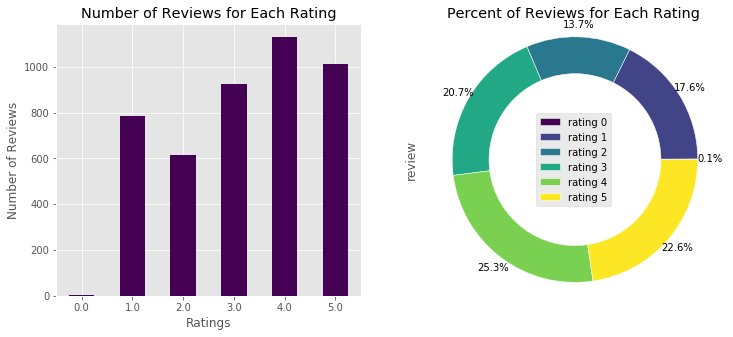

In [5]:
with plt.style.context('ggplot'):
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    

    bar_chart = df[['review', 'rating']].groupby(by=['rating']).count()['review'].plot(
        kind='bar', 
        ax=axs[0], 
        title='Number of Reviews for Each Rating', 
        rot=0, 
        colormap='viridis')
    axs[0].set_xlabel('Ratings')
    axs[0].set_ylabel('Number of Reviews')
    
    pie_chart = df[['review', 'rating']].groupby(by=['rating']).count()['review'].plot(
        kind='pie', 
        ax=axs[1], 
        title='Percent of Reviews for Each Rating', 
        colormap='viridis', 
        autopct='%1.1f%%', 
        pctdistance=1.1, 
        wedgeprops=dict(width=0.3, edgecolor='w'), 
        labels=None)
    axs[1].axis('equal')
    axs[1].legend(['rating 0', 'rating 1', 'rating 2', 'rating 3', 'rating 4', 'rating 5'] ,loc='center')

    plt.show()
    plt.close()

In [6]:
# removing rows with 0 rating
df = df[df.rating != 0]
df.reset_index(drop=True)

,company,review,rating,date,date_collected
0,Woolworths,-Great working environment with very good supp...,5.0,2 years ago,"2020, January"
1,Woolworths,"I enjoyed what I am doing, it's a tough job, b...",3.0,4 years ago,"2020, January"
2,Woolworths,Working with staff everyday. The ability to wo...,4.0,4 years ago,"2020, January"
3,Woolworths,Great opportunities for career advancement for...,4.0,4 years ago,"2020, January"
4,Woolworths,During peek sales periods; casuals get great h...,3.0,4 years ago,"2020, January"
...,...,...,...,...,...
4459,ALDI,The workers\nFaces paced,4.0,4 years ago,"2020, February"
4460,ALDI,Get a free work out ever load morning\nTimed o...,3.0,4 years ago,"2020, February"
4461,ALDI,Everyone was great to work with \nIt was hard ...,5.0,9 months ago,"2020, February"
4462,ALDI,Friends you make that's it\nGetting up early a...,5.0,2 years ago,"2020, February"


It might be a bit of insightful understanding to have a quick look at collected review_texts. Unprocessed text length distribution shows that most of the reviews are about 150 long, though there are cases as long as 2000 characters.

In [7]:
df['review_length'] = df['review'].str.len()
df.head()

,company,review,rating,date,date_collected,review_length
0,Woolworths,-Great working environment with very good supp...,5.0,2 years ago,"2020, January",578
1,Woolworths,"I enjoyed what I am doing, it's a tough job, b...",3.0,4 years ago,"2020, January",343
2,Woolworths,Working with staff everyday. The ability to wo...,4.0,4 years ago,"2020, January",320
3,Woolworths,Great opportunities for career advancement for...,4.0,4 years ago,"2020, January",446
4,Woolworths,During peek sales periods; casuals get great h...,3.0,4 years ago,"2020, January",454


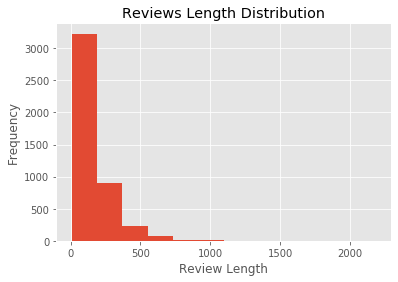

In [8]:
with plt.style.context('ggplot'):
    hist_chart = df['review_length'].plot(
        kind='hist', 
        bins=12, 
        title='Reviews Length Distribution')
    hist_chart.set_xlabel('Review Length')

In [9]:
df = df[df.review_length > 50]
#df = df[df.review_length < 850]
df.reset_index(drop=True)

,company,review,rating,date,date_collected,review_length
0,Woolworths,-Great working environment with very good supp...,5.0,2 years ago,"2020, January",578
1,Woolworths,"I enjoyed what I am doing, it's a tough job, b...",3.0,4 years ago,"2020, January",343
2,Woolworths,Working with staff everyday. The ability to wo...,4.0,4 years ago,"2020, January",320
3,Woolworths,Great opportunities for career advancement for...,4.0,4 years ago,"2020, January",446
4,Woolworths,During peek sales periods; casuals get great h...,3.0,4 years ago,"2020, January",454
...,...,...,...,...,...,...
4117,ALDI,"Nothing, no good things at all!\nNothing, no c...",1.0,2 years ago,"2020, February",79
4118,ALDI,Get a free work out ever load morning\nTimed o...,3.0,4 years ago,"2020, February",64
4119,ALDI,Everyone was great to work with \nIt was hard ...,5.0,9 months ago,"2020, February",76
4120,ALDI,Friends you make that's it\nGetting up early a...,5.0,2 years ago,"2020, February",62


In [10]:
df['review_length'].describe()

count    4122.000000
mean      175.346676
std       143.958883
min        51.000000
25%        85.000000
50%       128.000000
75%       214.000000
max      2184.000000
Name: review_length, dtype: float64

### 2. Text Cleaning
----------------------
The reviews’ content need to be cleaned for __`feature engineering`__. In that regard, special characters, punctuation, and stop words should be removed. And text should undergo `stemming` or `lemmatization` process before creating data features.


I will save cleaned text in a new column `review_cleaned`

In [11]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords #(may require to nltk.download('stopwords') before using)
from nltk.stem import WordNetLemmatizer #(may require to nltk.download('wordnet') before using)
from nltk.stem import PorterStemmer

First thing I remove `possessive pronouns`:

In [12]:
df['review_cleaned'] = df['review'].str.replace("'s", "")


'''
# in case of using word2vec model
df['review_cleaned'] = df['review']
'''

"\n# in case of using word2vec model\ndf['review_cleaned'] = df['review']\n"

Then let's remove punctuation and special characters .And turn every word into lowercase.

In [13]:
tokenizer = RegexpTokenizer(r'\w+')

In [14]:
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: tokenizer.tokenize(x.lower()))

Now let's remove `stop words`

Considering the fact that this is a __`sentiment`__ classification after all, I decided not to remove words __`not`__ & __`but`__.

In [15]:
stop_words = stopwords.words('english')
stop_words.remove('not')
stop_words.remove('but')

In [16]:
# function used to remove stop words from ant text
def remove_stop_words(text):
    review = [word for word in text if word not in stop_words]
    return review

In [17]:
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: remove_stop_words(x))

Probably as final step, let's lemmatize words and join them together again:

In [18]:
# Option for lemmatizing

lemmatizer = WordNetLemmatizer()

# used to lemmatize any text
def word_lemmatizer(text):
    review = " ".join([lemmatizer.lemmatize(x) for x in text])
    return review

df['review_cleaned'] = df['review_cleaned'].apply(lambda x: word_lemmatizer(x))

In [18]:
# Option for stemming

'''
stemmer = PorterStemmer()

# used to stemming any text
def word_stemmer(text):
    review = " ".join([stemmer.stem(x) for x in text])
    return review

df['review_cleaned'] = df['review_cleaned'].apply(lambda x: word_stemmer(x))
'''

'\nstemmer = PorterStemmer()\n\n# used to stemming any text\ndef word_stemmer(text):\n    review = " ".join([stemmer.stem(x) for x in text])\n    return review\n\ndf[\'review_cleaned\'] = df[\'review_cleaned\'].apply(lambda x: word_stemmer(x))\n'

In [19]:
# option for joining tokens together

'''
def join_token(text):
    review = " ".join([x for x in text])
    return review

df['review_cleaned'] = df['review_cleaned'].apply(lambda x: join_token(x))
'''

'\ndef join_token(text):\n    review = " ".join([x for x in text])\n    return review\n\ndf[\'review_cleaned\'] = df[\'review_cleaned\'].apply(lambda x: join_token(x))\n'

In [19]:
df.head()

,company,review,rating,date,date_collected,review_length,review_cleaned
0,Woolworths,-Great working environment with very good supp...,5.0,2 years ago,"2020, January",578,great working environment good support co work...
1,Woolworths,"I enjoyed what I am doing, it's a tough job, b...",3.0,4 years ago,"2020, January",343,enjoyed tough job but loved camaraderie within...
2,Woolworths,Working with staff everyday. The ability to wo...,4.0,4 years ago,"2020, January",320,working staff everyday ability work different ...
3,Woolworths,Great opportunities for career advancement for...,4.0,4 years ago,"2020, January",446,great opportunity career advancement right peo...
4,Woolworths,During peek sales periods; casuals get great h...,3.0,4 years ago,"2020, January",454,peek sale period casuals get great hour manage...


Considering the fact that this is a sentiment classification, I will reduce labels categorries as follows:
* Ratings 1 & 2 → sentiment_category 0 → meaning **_UNENGAGED_**
* Rating 3 → sentiment_category 1 → meaning **_MEDIOCRE
_**
* Rattings 4 & 5 → sentiment_category 2 → meaning **_STOKED_**


In [20]:
# function to return sentiment_category based on reviews' rating
def sentiment(rating):
    if rating == 1 or rating == 2:
        return 0
    elif rating == 3:
        return 1
    else:
        return 2

In [21]:
df['sentiment_category'] = df['rating'].apply(lambda x: sentiment(x))

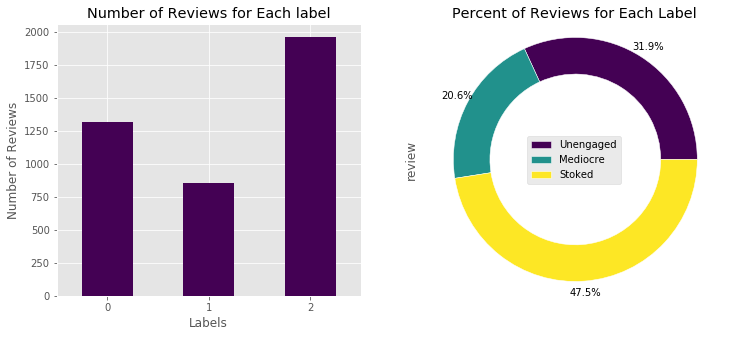

In [22]:
with plt.style.context('ggplot'):
    fig, axs = plt.subplots(1, 2, figsize=(12,5))
    

    bar_chart = df[['review', 'sentiment_category']].groupby(by=['sentiment_category']).count()['review'].plot(
        kind='bar', 
        ax=axs[0], 
        title='Number of Reviews for Each label', 
        rot=0, 
        colormap='viridis')
    axs[0].set_xlabel('Labels')
    axs[0].set_ylabel('Number of Reviews')
    
    pie_chart = df[['review', 'sentiment_category']].groupby(by=['sentiment_category']).count()['review'].plot(
        kind='pie', 
        ax=axs[1], 
        title='Percent of Reviews for Each Label', 
        colormap='viridis', 
        autopct='%1.1f%%', 
        pctdistance=1.1, 
        wedgeprops=dict(width=0.3, edgecolor='w'), 
        labels=None)
    axs[1].axis('equal')
    axs[1].legend(['Unengaged', 'Mediocre', 'Stoked'] ,loc='center')

    plt.show()
    plt.close()

In [23]:
df[['review_length', 'sentiment_category']].groupby(['sentiment_category']).mean()

,review_length
sentiment_category,
0,172.520944
1,183.102353
2,173.875447


Let's save part of the data frame to be used for model development

In [24]:
df[['review_cleaned', 'sentiment_category']].head()

,review_cleaned,sentiment_category
0,great working environment good support co work...,2
1,enjoyed tough job but loved camaraderie within...,1
2,working staff everyday ability work different ...,2
3,great opportunity career advancement right peo...,2
4,peek sale period casuals get great hour manage...,1


In [25]:
import pickle

In [26]:
with open ('pickle_cleaned_data', 'wb') as output:
    pickle.dump(df[['review_cleaned', 'sentiment_category']], output)